In [47]:
import pandas as pd

df = pd.read_csv("DB/reference/out/score_final.csv")
display(df.head())

,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
0,20200227_CIVIL_conclusions_MAE_page_1.txt,0.6157,0.5013,264,148,0.560606,12,17,1.416667,319,...,0,0,0,0,0.000000,0.022727,0.067568,2.972973,0.460389,-resize 200% -colorspace Gray -normalize -auto...
1,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7293,0.5705,535,310,0.579439,9,68,7.555556,420,...,1,0,2,2,1.000000,0.074766,0.077419,1.035484,0.535183,-resize 200% -colorspace Gray -normalize -auto...
2,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6054,521,313,0.600768,25,48,1.920000,422,...,1,0,3,1,0.333333,0.053743,0.054313,1.010612,0.510397,-resize 200% -colorspace Gray -normalize -auto...
3,20210604_CIVIL_Conclusions_Thirion_page_1.txt,0.6053,0.5124,235,132,0.561702,13,15,1.153846,281,...,0,0,0,0,0.000000,0.025532,0.015152,0.593434,0.455544,-resize 200% -colorspace Gray -normalize -auto...
4,20210604_CIVIL_Conclusions_Thirion_page_3.txt,0.5905,0.4657,326,189,0.579755,14,15,1.071429,314,...,0,0,0,0,0.000000,0.046012,0.031746,0.689947,0.499856,-resize 200% -colorspace Gray -normalize -auto...


In [49]:
# Affichage du WER moyen par variante de prétraitement
classement = df.groupby('parametres_traitement')['wer'].mean().sort_values()
display(classement)

parametres_traitement
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu               0.631400
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu              0.738314
-resize 200% -colorspace Gray -despeckle -auto-threshold Otsu              0.739271
-resize 200% -colorspace Gray -sharpen 0x0.2 -auto-threshold Otsu          0.739943
-resize 200% -colorspace Gray -sharpen 0x4 -auto-threshold Otsu            0.741400
-resize 200% -colorspace Gray -normalize -contrast -auto-threshold Otsu    0.745343
Name: wer, dtype: float64

C:\Users\damien_dous\AppData\Local\Temp\ipykernel_17036\2642400930.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

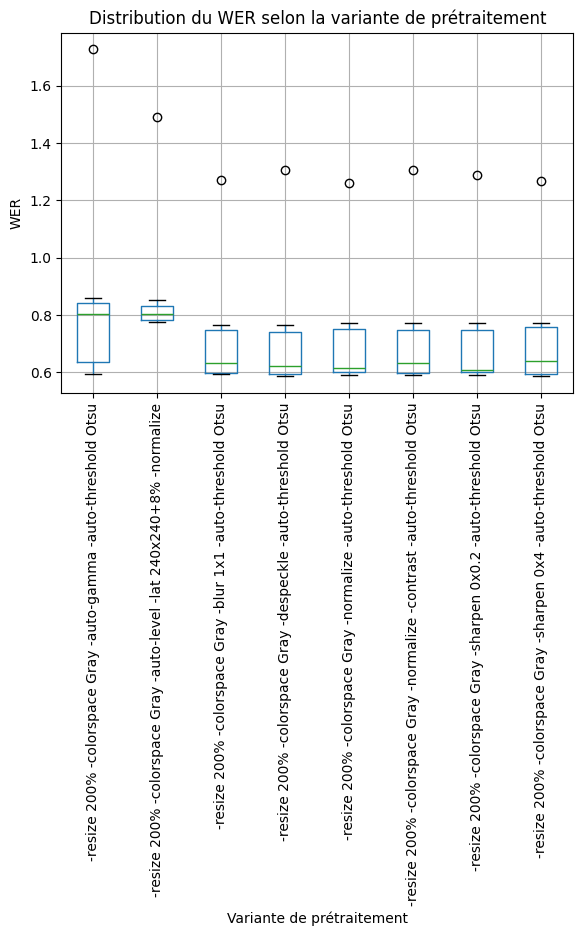

In [31]:
import matplotlib.pyplot as plt

# Boxplot du WER par variante
plt.figure(figsize=(12,6))
df.boxplot(column='wer', by='parametres_traitement', rot=90)
plt.title('Distribution du WER selon la variante de prétraitement')
plt.suptitle('')
plt.xlabel("Variante de prétraitement")
plt.ylabel("WER")
plt.tight_layout()
plt.show()

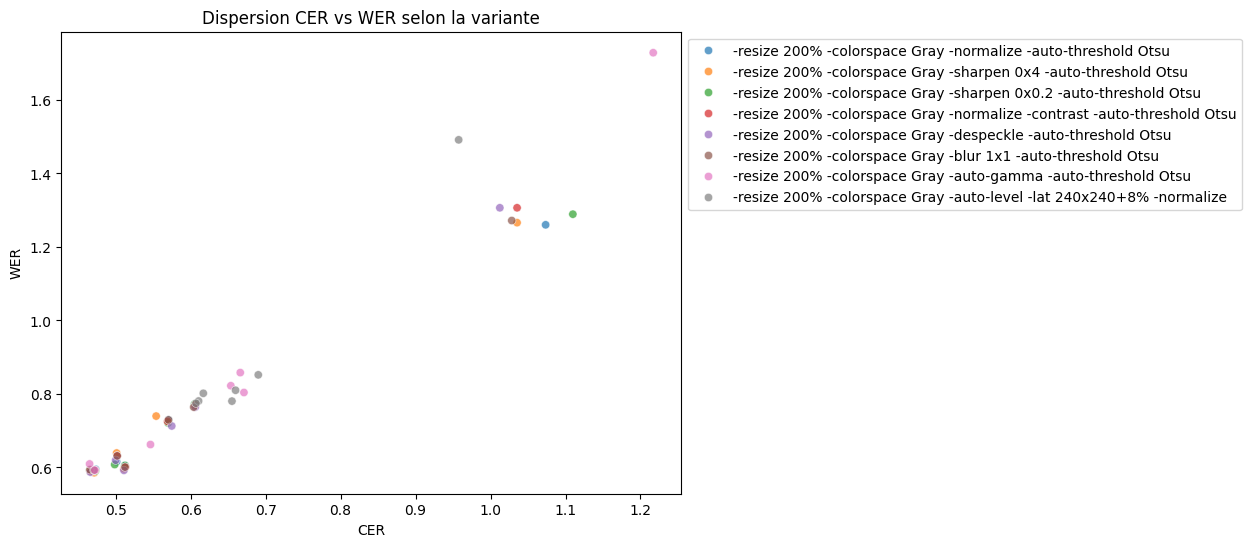

In [32]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="cer", y="wer", hue="parametres_traitement", alpha=0.7)
plt.title("Dispersion CER vs WER selon la variante")
plt.xlabel("CER")
plt.ylabel("WER")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

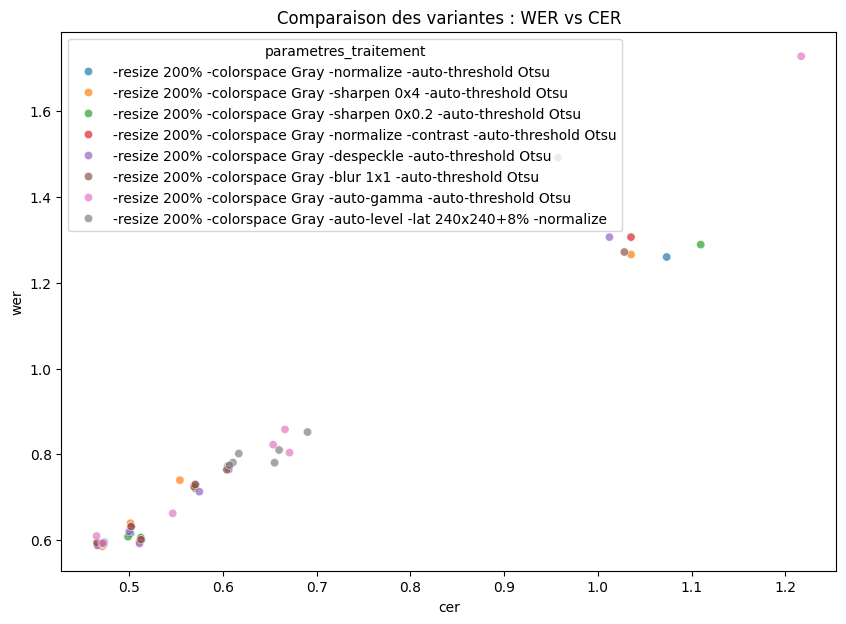

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="cer", y="wer", hue="parametres_traitement", alpha=0.7)
plt.title("Comparaison des variantes : WER vs CER")
plt.show()

In [34]:
# 3. Pour pondérer et afficher une note globale
if "score_global" in df.columns:
    best_score = df.loc[df.groupby("fichier")["score_global"].idxmax()]
    display(best_score)
else:
    print("Ajoute d'abord la colonne score_global dans le CSV si tu veux faire un tri pondéré.")


,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
55,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.4913,0.9575,165,241,1.460606,14,174,12.428571,369,...,0,0,0,0,0.000000,0.060606,0.078838,1.300830,0.358174,-resize 200% -colorspace Gray -auto-level -lat...
25,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7252,0.5693,535,318,0.594393,9,66,7.333333,420,...,0,0,2,2,1.000000,0.074766,0.062893,0.841195,0.535240,-resize 200% -colorspace Gray -normalize -cont...
17,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6054,521,313,0.600768,25,50,2.000000,422,...,1,0,3,1,0.333333,0.053743,0.060703,1.129507,0.520737,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
14,20200227_CIVIL_conclusions_MAE_page_1.txt,0.6078,0.4987,264,148,0.560606,12,17,1.416667,319,...,0,0,0,0,0.000000,0.022727,0.060811,2.675676,0.469366,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
12,20200227_CIVIL_conclusions_MAE_page_10.txt,0.5856,0.4714,447,258,0.577181,11,34,3.090909,89,...,0,0,0,0,0.000000,0.031320,0.046512,1.485050,0.500654,-resize 200% -colorspace Gray -sharpen 0x4 -au...
8,20210604_CIVIL_Conclusions_Thirion_page_1.txt,0.5965,0.5110,235,132,0.561702,13,15,1.153846,281,...,0,0,0,0,0.000000,0.025532,0.022727,0.890152,0.476027,-resize 200% -colorspace Gray -sharpen 0x4 -au...
37,20210604_CIVIL_Conclusions_Thirion_page_3.txt,0.5937,0.4657,326,189,0.579755,14,14,1.000000,314,...,1,0,0,0,0.000000,0.046012,0.037037,0.804938,0.507145,-resize 200% -colorspace Gray -blur 1x1 -auto-...


In [35]:
# 3. Afficher la variante la plus performante pour chaque page selon le WER
idx_best_wer = df.groupby('fichier')['wer'].idxmin()
df.loc[idx_best_wer].sort_values('wer')

,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
12,20200227_CIVIL_conclusions_MAE_page_10.txt,0.5856,0.4714,447,258,0.577181,11,34,3.090909,89,...,0,0,0,0,0.000000,0.031320,0.046512,1.485050,0.500654,-resize 200% -colorspace Gray -sharpen 0x4 -au...
30,20210604_CIVIL_Conclusions_Thirion_page_3.txt,0.5873,0.4662,326,190,0.582822,14,18,1.285714,314,...,0,0,0,0,0.000000,0.046012,0.031579,0.686316,0.483189,-resize 200% -colorspace Gray -despeckle -auto...
29,20210604_CIVIL_Conclusions_Thirion_page_1.txt,0.5921,0.5110,235,133,0.565957,13,17,1.307692,281,...,0,0,0,0,0.000000,0.025532,0.015038,0.588972,0.446285,-resize 200% -colorspace Gray -despeckle -auto...
14,20200227_CIVIL_conclusions_MAE_page_1.txt,0.6078,0.4987,264,148,0.560606,12,17,1.416667,319,...,0,0,0,0,0.000000,0.022727,0.060811,2.675676,0.469366,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
32,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7128,0.5748,535,310,0.579439,9,67,7.444444,420,...,1,0,2,2,1.000000,0.074766,0.074194,0.992339,0.534078,-resize 200% -colorspace Gray -despeckle -auto...
31,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7641,0.6061,521,313,0.600768,25,51,2.040000,422,...,1,0,3,1,0.333333,0.053743,0.054313,1.010612,0.508373,-resize 200% -colorspace Gray -despeckle -auto...
6,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.2601,1.0735,165,251,1.521212,14,68,4.857143,369,...,0,0,0,0,0.000000,0.060606,0.474104,7.822709,0.236764,-resize 200% -colorspace Gray -normalize -auto...


In [36]:
# 4. Afficher la variante la plus performante pour chaque page selon le score global
idx_best_global = df.groupby('fichier')['score_global'].idxmax()
df.loc[idx_best_global].sort_values('score_global', ascending=False)

,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
25,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7252,0.5693,535,318,0.594393,9,66,7.333333,420,...,0,0,2,2,1.000000,0.074766,0.062893,0.841195,0.535240,-resize 200% -colorspace Gray -normalize -cont...
17,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6054,521,313,0.600768,25,50,2.000000,422,...,1,0,3,1,0.333333,0.053743,0.060703,1.129507,0.520737,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
37,20210604_CIVIL_Conclusions_Thirion_page_3.txt,0.5937,0.4657,326,189,0.579755,14,14,1.000000,314,...,1,0,0,0,0.000000,0.046012,0.037037,0.804938,0.507145,-resize 200% -colorspace Gray -blur 1x1 -auto-...
12,20200227_CIVIL_conclusions_MAE_page_10.txt,0.5856,0.4714,447,258,0.577181,11,34,3.090909,89,...,0,0,0,0,0.000000,0.031320,0.046512,1.485050,0.500654,-resize 200% -colorspace Gray -sharpen 0x4 -au...
8,20210604_CIVIL_Conclusions_Thirion_page_1.txt,0.5965,0.5110,235,132,0.561702,13,15,1.153846,281,...,0,0,0,0,0.000000,0.025532,0.022727,0.890152,0.476027,-resize 200% -colorspace Gray -sharpen 0x4 -au...
14,20200227_CIVIL_conclusions_MAE_page_1.txt,0.6078,0.4987,264,148,0.560606,12,17,1.416667,319,...,0,0,0,0,0.000000,0.022727,0.060811,2.675676,0.469366,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
55,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.4913,0.9575,165,241,1.460606,14,174,12.428571,369,...,0,0,0,0,0.000000,0.060606,0.078838,1.300830,0.358174,-resize 200% -colorspace Gray -auto-level -lat...


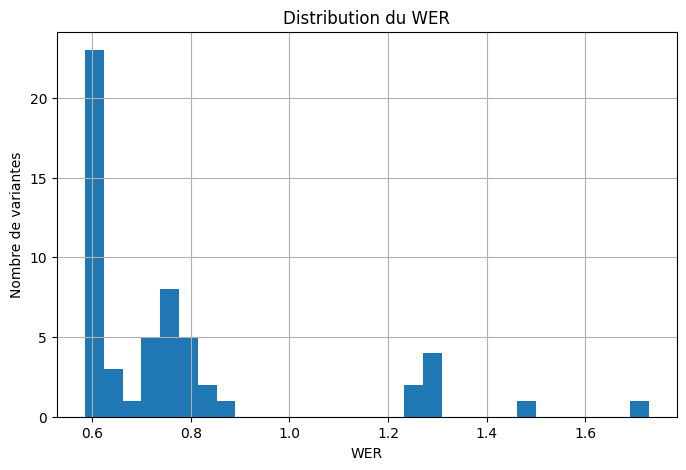

In [38]:
# 5. Histogramme des WER pour toutes les variantes
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['wer'].hist(bins=30)
plt.xlabel("WER")
plt.ylabel("Nombre de variantes")
plt.title("Distribution du WER")
plt.show()

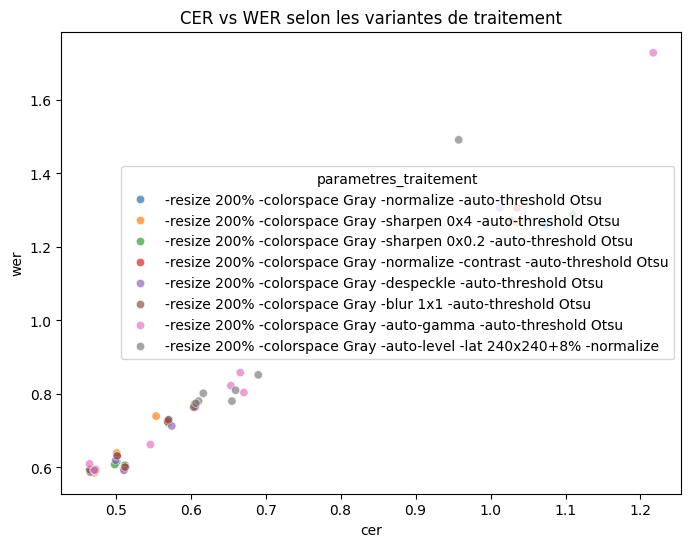

In [40]:
# 6. Scatter plot WER vs CER coloré par paramètres de traitement
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="cer", y="wer", hue="parametres_traitement", alpha=0.7)
plt.title("CER vs WER selon les variantes de traitement")
plt.show()

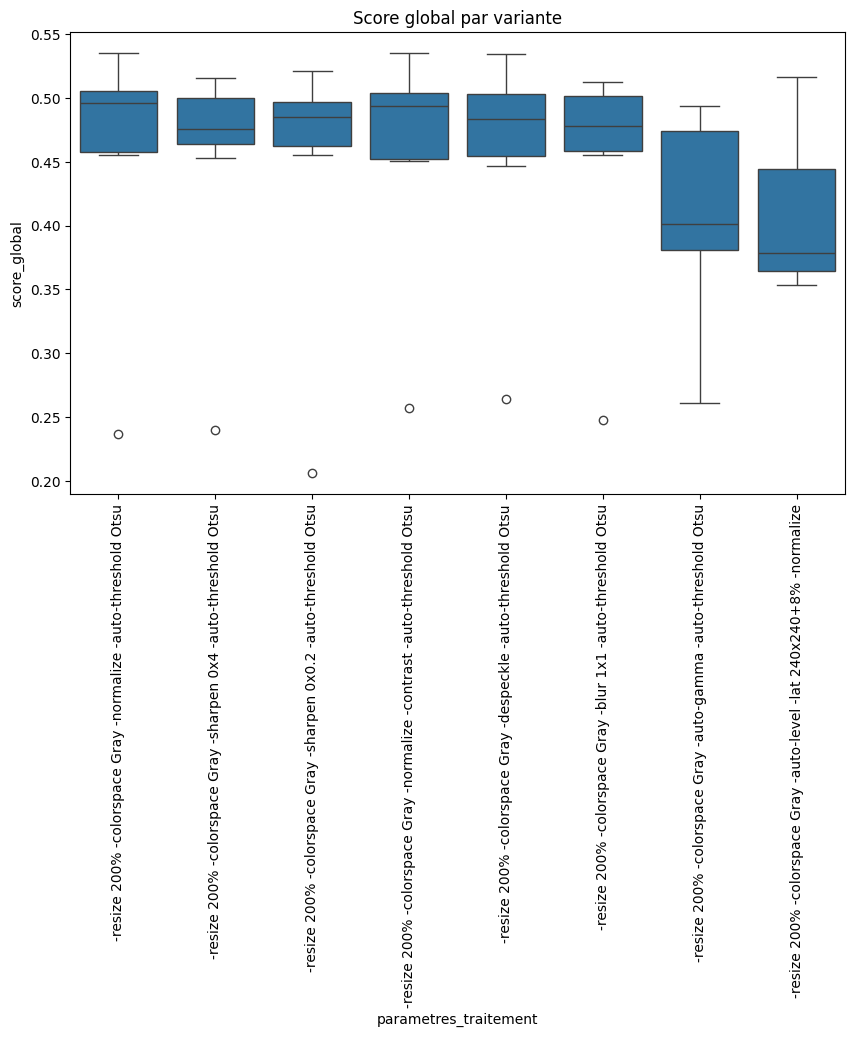

In [41]:
# 7. Boxplot du score global selon chaque variante
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="parametres_traitement", y="score_global")
plt.xticks(rotation=90)
plt.title("Score global par variante")
plt.show()

In [42]:
# 8. Comparer les scores moyens par méthode
df.groupby('parametres_traitement')[['wer', 'cer', 'score_global']].mean().sort_values('score_global', ascending=False)

,wer,cer,score_global
parametres_traitement,,,
-resize 200% -colorspace Gray -normalize -contrast -auto-threshold Otsu,0.745343,0.594971,0.456925
-resize 200% -colorspace Gray -despeckle -auto-threshold Otsu,0.739271,0.591643,0.456866
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu,0.738314,0.600300,0.456328
-resize 200% -colorspace Gray -sharpen 0x4 -auto-threshold Otsu,0.741400,0.592171,0.451224
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu,0.740529,0.593429,0.450960
-resize 200% -colorspace Gray -sharpen 0x0.2 -auto-threshold Otsu,0.739943,0.604971,0.447269
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu,0.868129,0.670229,0.409444
-resize 200% -colorspace Gray -auto-level -lat 240x240+8% -normalize,0.898657,0.685329,0.409414


In [45]:
# 9. Trier et afficher les 10 variantes les plus efficaces tous fichiers confondus
df.sort_values('score_global', ascending=False).head(10)

,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
25,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7252,0.5693,535,318,0.594393,9,66,7.333333,420,...,0,0,2,2,1.000000,0.074766,0.062893,0.841195,0.535240,-resize 200% -colorspace Gray -normalize -cont...
4,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7293,0.5705,535,310,0.579439,9,68,7.555556,420,...,1,0,2,2,1.000000,0.074766,0.077419,1.035484,0.535183,-resize 200% -colorspace Gray -normalize -auto...
32,20130905_CIVIL_PV_GALLORO_page_1.txt,0.7128,0.5748,535,310,0.579439,9,67,7.444444,420,...,1,0,2,2,1.000000,0.074766,0.074194,0.992339,0.534078,-resize 200% -colorspace Gray -despeckle -auto...
17,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6054,521,313,0.600768,25,50,2.000000,422,...,1,0,3,1,0.333333,0.053743,0.060703,1.129507,0.520737,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
52,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.8100,0.6599,521,329,0.631478,25,77,3.080000,422,...,1,0,3,1,0.333333,0.053743,0.075988,1.413917,0.516777,-resize 200% -colorspace Gray -auto-level -lat...
9,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6064,521,312,0.598848,25,48,1.920000,422,...,3,0,3,1,0.333333,0.053743,0.060897,1.133127,0.515396,-resize 200% -colorspace Gray -sharpen 0x4 -au...
24,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7704,0.6064,521,316,0.606526,25,50,2.000000,422,...,2,0,3,1,0.333333,0.053743,0.060127,1.118784,0.513167,-resize 200% -colorspace Gray -normalize -cont...
38,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7641,0.6041,521,313,0.600768,25,50,2.000000,422,...,1,0,3,1,0.333333,0.053743,0.054313,1.010612,0.512581,-resize 200% -colorspace Gray -blur 1x1 -auto-...
3,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7724,0.6054,521,313,0.600768,25,48,1.920000,422,...,1,0,3,1,0.333333,0.053743,0.054313,1.010612,0.510397,-resize 200% -colorspace Gray -normalize -auto...
31,20130911_CIVIL_PV_GAWRONSKI_page_1.txt,0.7641,0.6061,521,313,0.600768,25,51,2.040000,422,...,1,0,3,1,0.333333,0.053743,0.054313,1.010612,0.508373,-resize 200% -colorspace Gray -despeckle -auto...


In [46]:
# 10. Chercher les pages qui posent problème (WER ou CER > 1)
df[(df['wer'] > 1) | (df['cer'] > 1)]

,fichier,wer,cer,nb_mots_ref,nb_mots_ocr,ratio_mots,nb_paragraphes_ref,nb_paragraphes_ocr,ratio_paragraphes,nb_maj_ref,...,nb_exclam_ocr,ratio_exclam,nb_quest_ref,nb_quest_ocr,ratio_quest,ratio_punct_ref,ratio_punct_ocr,ratio_punct_ratio,score_global,parametres_traitement
6,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.2601,1.0735,165,251,1.521212,14,68,4.857143,369,...,0,0,0,0,0.0,0.060606,0.474104,7.822709,0.236764,-resize 200% -colorspace Gray -normalize -auto...
13,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.2659,1.0354,165,246,1.490909,14,73,5.214286,369,...,2,0,0,0,0.0,0.060606,0.426829,7.042683,0.239637,-resize 200% -colorspace Gray -sharpen 0x4 -au...
20,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.2890,1.1098,165,249,1.509091,14,66,4.714286,369,...,0,0,0,0,0.0,0.060606,0.722892,11.927711,0.206076,-resize 200% -colorspace Gray -sharpen 0x0.2 -...
28,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.3064,1.0354,165,251,1.521212,14,67,4.785714,369,...,0,0,0,0,0.0,0.060606,0.330677,5.456175,0.256984,-resize 200% -colorspace Gray -normalize -cont...
35,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.3064,1.0124,165,252,1.527273,14,68,4.857143,369,...,0,0,0,0,0.0,0.060606,0.277778,4.583333,0.264186,-resize 200% -colorspace Gray -despeckle -auto...
42,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.2717,1.0283,165,246,1.490909,14,65,4.642857,369,...,1,0,0,0,0.0,0.060606,0.402439,6.640244,0.247901,-resize 200% -colorspace Gray -blur 1x1 -auto-...
49,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.7283,1.2170,165,298,1.806061,14,126,9.000000,369,...,4,0,0,0,0.0,0.060606,0.191275,3.156040,0.261152,-resize 200% -colorspace Gray -auto-gamma -aut...
55,20041102_CIVIL_dossier_impots_locaux_st_julien...,1.4913,0.9575,165,241,1.460606,14,174,12.428571,369,...,0,0,0,0,0.0,0.060606,0.078838,1.300830,0.358174,-resize 200% -colorspace Gray -auto-level -lat...
